(699, 10)
clump_thickness           0
unfi_cell_size            0
unif_cell_shape           0
marg_adhesion             0
single_epith_cell_size    0
bare_nuclei               0
bland_chrom               0
norm_nucleoli             0
mitoses                   0
class                     0
dtype: int64
2    458
4    241
Name: class, dtype: int64


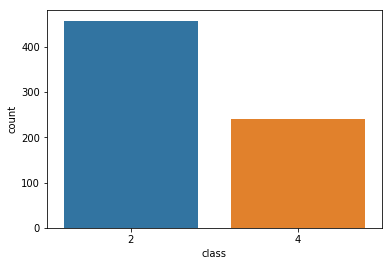

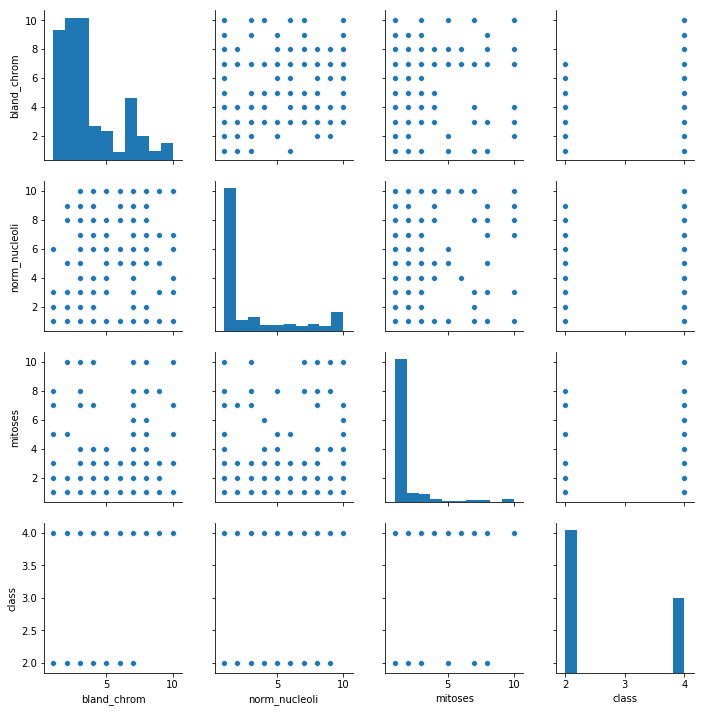

                        unfi_cell_size  unif_cell_shape  marg_adhesion  \
unfi_cell_size                1.000000         0.906882       0.705582   
unif_cell_shape               0.906882         1.000000       0.683079   
marg_adhesion                 0.705582         0.683079       1.000000   
single_epith_cell_size        0.751799         0.719668       0.599599   
bland_chrom                   0.755721         0.735948       0.666715   
norm_nucleoli                 0.722865         0.719446       0.603352   
mitoses                       0.458693         0.438911       0.417633   
class                         0.817904         0.818934       0.696800   

                        single_epith_cell_size  bland_chrom  norm_nucleoli  \
unfi_cell_size                        0.751799     0.755721       0.722865   
unif_cell_shape                       0.719668     0.735948       0.719446   
marg_adhesion                         0.599599     0.666715       0.603352   
single_epith_cell_siz

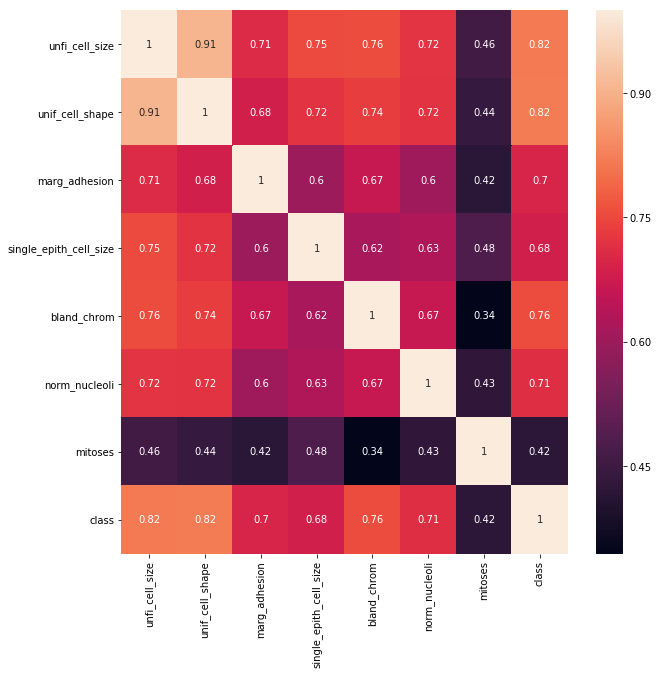

KNN 
 [[78  5]
 [ 5 52]]
Accuracy is:  92.85714285714286 %

RandamForest 
 [[77  6]
 [ 6 51]]
Accuracy is:  91.42857142857143 %

Logistic Regression 
 [[77  6]
 [ 5 52]]
Accuracy is:  92.14285714285714 %

SVM  
 [[75  8]
 [ 4 53]]
Accuracy is:  91.42857142857143 %

SVM KERNEL  
 [[77  6]
 [ 2 55]]
Accuracy is:  94.28571428571429 %

GaussainNB 


c:\users\akash.galagali\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 [[76  7]
 [ 4 53]]
Accuracy is:  92.14285714285714 %

DecisionTree 
 [[78  5]
 [ 5 52]]
Accuracy is:  92.85714285714286 %

[92.8571, 91.4286, 92.1429, 91.4286, 94.2857, 92.1429, 92.8571]


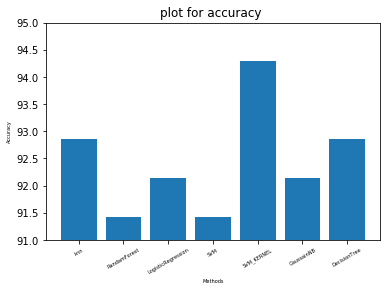

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("C:/users/Akash.Galagali/Desktop/Project_ML/mlknn/breast-cancer-wisconsin (1).data")
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)
print(df.shape)
print(df.isna().sum())
print(df['class'].value_counts())


sns.countplot(df['class'])
plt.show()

#To create pair plot
sns.pairplot(df.iloc[:,6:10])
plt.show()
X = np.array(df.drop(['class'],1))
Y = np.array(df['class'])

print(df.iloc[:,1:11].corr())
df.iloc[:,1:11].corr()
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:11].corr(),annot =True)
plt.show()

X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 100)

#Declare a array for storing accuracy of different algorithm 

Accuracy = []

#1 KNN Algorithm 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

c = print("KNN \n",cm)

accuracy = (cm[0,0]+cm[1,1])*100/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
print("Accuracy is: ",accuracy,"%\n")
Accuracy.append(round(accuracy,4))

#2 Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)


cm = confusion_matrix(Y_test, Y_pred)

c = print("RandamForest \n",cm)

accuracy = (cm[0,0]+cm[1,1])*100/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
print("Accuracy is: ",accuracy,"%\n")
Accuracy.append(round(accuracy,4))

#3 Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

c = print("Logistic Regression \n",cm)

accuracy = (cm[0,0]+cm[1,1])*100/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
print("Accuracy is: ",accuracy,"%\n")
Accuracy.append(round(accuracy,4))

#4 using svm algorithm to the training set 
from sklearn.svm import SVC
classifier = SVC(gamma='auto',kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)


Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

c = print("SVM  \n",cm)

accuracy = (cm[0,0]+cm[1,1])*100/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
print("Accuracy is: ",accuracy,"%\n")

Accuracy.append(round(accuracy,4))

#5 Using SVC method of svm class to use Kernel SVM Algorithm

from sklearn.svm import SVC
classifier = SVC(gamma='auto',kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

c = print("SVM KERNEL  \n",cm)

accuracy = (cm[0,0]+cm[1,1])*100/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
print("Accuracy is: ",accuracy,"%\n")
Accuracy.append(round(accuracy,4))

#6 Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

c = print("GaussainNB \n",cm)

accuracy = (cm[0,0]+cm[1,1])*100/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
print("Accuracy is: ",accuracy,"%\n")
Accuracy.append(round(accuracy,4))

#7 Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)


cm = confusion_matrix(Y_test, Y_pred)

c = print("DecisionTree \n",cm)

accuracy = (cm[0,0]+cm[1,1])*100/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
print("Accuracy is: ",accuracy,"%\n")
Accuracy.append(round(accuracy,4))

print(Accuracy)
label = ['knn','RandamForest','LogisticRegression','SVM','SVM_KERNEL','GaussainNB','DecisionTree']



# this is for plotting purpose
index = np.arange(len(label))
plt.ylim(bottom=91, top=95)
plt.bar(index, Accuracy)
plt.xlabel('Methods', fontsize=5)
plt.ylabel('Accuracy', fontsize=5)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('plot for accuracy ')
plt.show()
    

